# **Introduction**

Our journey delves into the SuperStore Sales dataset, a snapshot of a US retail giant's four-year journey. Armed with the principles of time series analysis, we embark on a quest to extract meaningful patterns, predict future sales, and uncover the nuances that shape the retail landscape.

As we traverse the corridors of this dataset, we will explore the intricacies of order dates, shipping modes, customer segments, and regional variations. The goal? To empower decision-makers with insights that transcend the temporal boundaries of the past, enabling them to navigate the ever-shifting tides of the retail market.  
Dataset: Superstore Sales  
The SuperStore Sales dataset encapsulates a comprehensive retail narrative spanning four years. This treasure trove of information encompasses diverse facets of the global superstore's operations, from order and shipping details to customer demographics and product categories.
You can access the dataset <a href="https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting/data?select=train.csv"> here</a>.

The dataset consists of 9800 entries, indexed from 0 to 9799.
Data columns(total 18 columns):

- **Row ID** : An identifier for each row in the dataset.
- **Order ID**: A unique identifier for each order placed.
- **Order Date**: The date when the order was placed.
- **Ship Date**: The date when the order was shipped.
- **Ship Mode**: The mode of shipment chosen for the order (e.g., Second Class, Standard Class).
- **Customer ID**: A unique identifier for each customer.
- **Customer Name**: The name of the customer placing the order.
- **Segment**: The market segment to which the customer belongs (e.g., Consumer, Corporate).
- **Country**: The country where the order is placed.
- **City**: The city where the customer is located.
- **State**: The state where the customer is located.
- **Postal Code**: The postal code of the customer's location.
- **Region**: The region where the customer is located.
- **Product ID**: A unique identifier for each product.
- **Category**: The broad category to which the product belongs (e.g., Furniture, Office Supplies).
- **Sub-Category**: The specific sub-category of the product (e.g., Chairs, Labels).
- **Product Name**: The name of the product.
- **Sales**: The sales revenue associated with the order.

# **Import libraries neccesary**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Exploratory Data**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/namhai03/Do_an_co_so/main/store%20slaes.csv")
# Tranform date to pandas datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%d/%m/%Y')
# adding month feature
df['month'] = pd.to_datetime(df['Order Date']).dt.to_period('M')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,month
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10


In [ ]:
df.describe()
df_describe = pd.DataFrame(df.describe())
df_describe.drop(columns=['Row ID', 'Postal Code'], inplace=True)
df_describe.to_csv("df_describe.csv")
df_describe

,Order Date,Sales
count,9800,9800.000000
mean,2017-05-01 05:13:51.673469440,230.769059
min,2015-01-03 00:00:00,0.444000
25%,2016-05-24 00:00:00,17.248000
50%,2017-06-26 00:00:00,54.490000
75%,2018-05-15 00:00:00,210.605000
max,2018-12-30 00:00:00,22638.480000
std,NaN,626.651875


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [ ]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
month             0
dtype: int64

In [ ]:
df[df["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,month
2234,2235,CA-2018-104066,2018-12-05,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,2018-12
5274,5275,CA-2016-162887,2016-11-07,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,2016-11
8798,8799,US-2017-150140,2017-04-06,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,2017-04
9146,9147,US-2017-165505,2017-01-23,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2017-01
9147,9148,US-2017-165505,2017-01-23,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,2017-01
9148,9149,US-2017-165505,2017-01-23,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,2017-01
9386,9387,US-2018-127292,2018-01-19,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,2018-01
9387,9388,US-2018-127292,2018-01-19,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,2018-01
9388,9389,US-2018-127292,2018-01-19,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,2018-01
9389,9390,US-2018-127292,2018-01-19,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,2018-01


There are only missing values in Postal Code column of Burlington city. We can search up the postal code and fillna with it.

In [ ]:
df['Postal Code'] = df['Postal Code'].fillna(27215)

Grouping to understand some of the categorical fields.

In [ ]:
df['Segment'].value_counts()

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

In [ ]:
df['Region'].value_counts()

Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64

In [ ]:
df['Category'].value_counts()

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

In [ ]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

In [ ]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

In [ ]:
# this function is to help group and plot sales by differnt features. The functions takes feature name and top classes in each gruop to plot
def sales_plot_by_group(group, top=50, color='blue'):
    sales_by_group = df.groupby(group)['Sales'].sum() # group sales by feature
    sales_by_group.sort_values(ascending= False, inplace=True) # sort
    sales_by_group = sales_by_group.head(top) # select top records
    plt.figure(figsize = (15,4))
    plt.title('Sales by {}'.format(group))
    plt.ylabel('Sales in USD')
    plt.bar(sales_by_group.index, sales_by_group, color=color, alpha = 0.5)
    plt.xticks(rotation=90)
# add sum of sales for each bar and place it in the center of the bar
    for x,y in sales_by_group.items():
        plt.text(x,sales_by_group.max()/2, f'${int(y):,.0f}', rotation=90, horizontalalignment='center', fontsize=12)
    plt.show

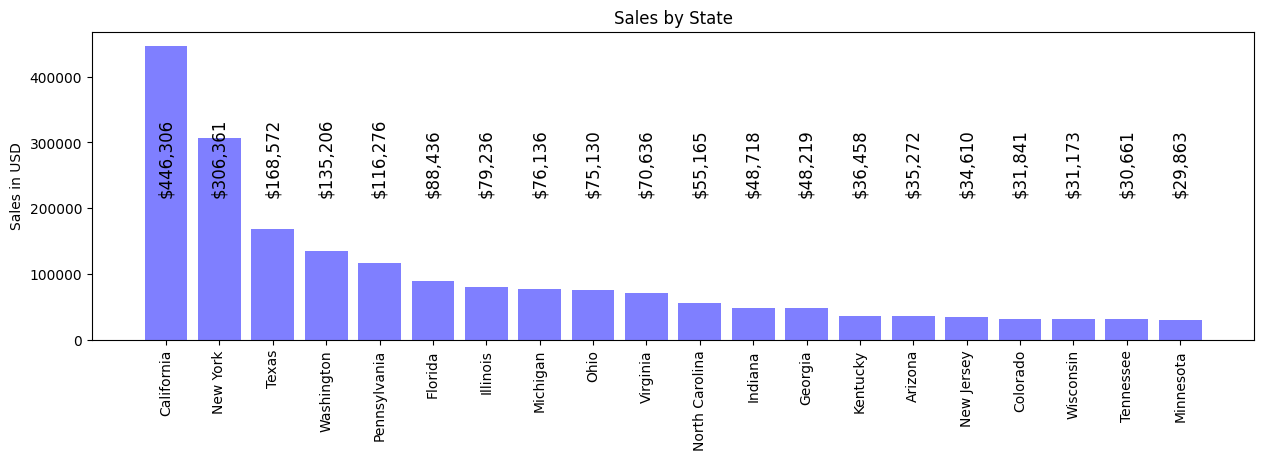

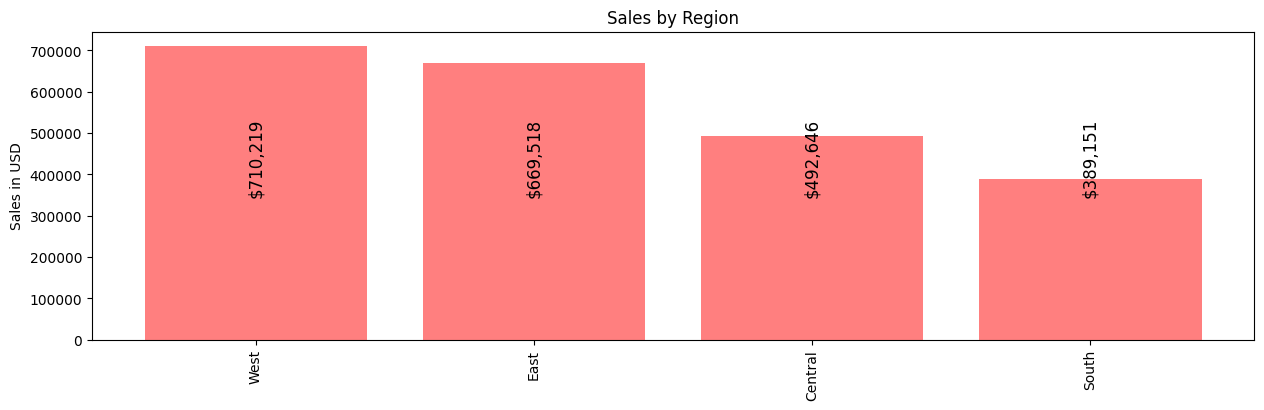

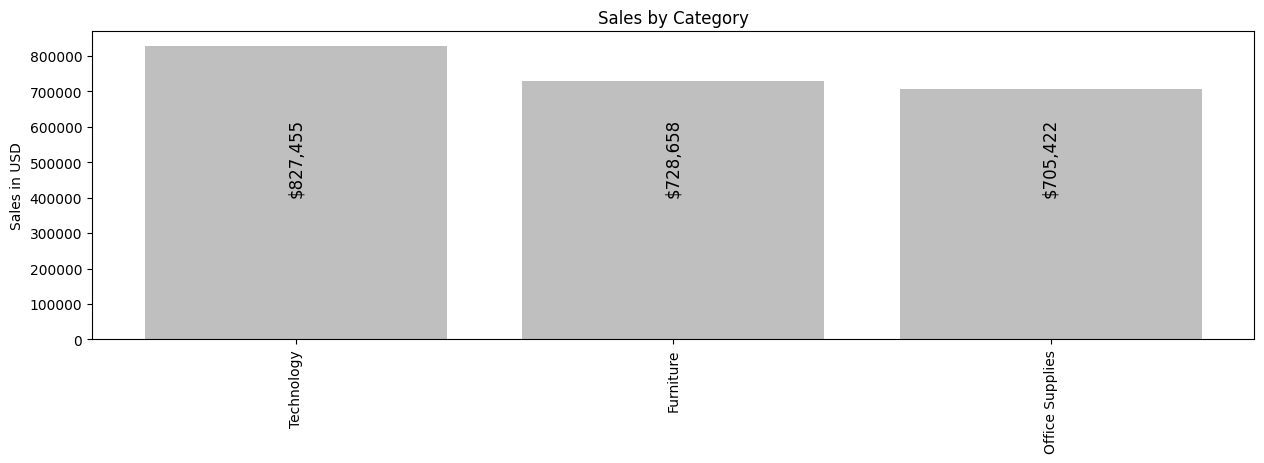

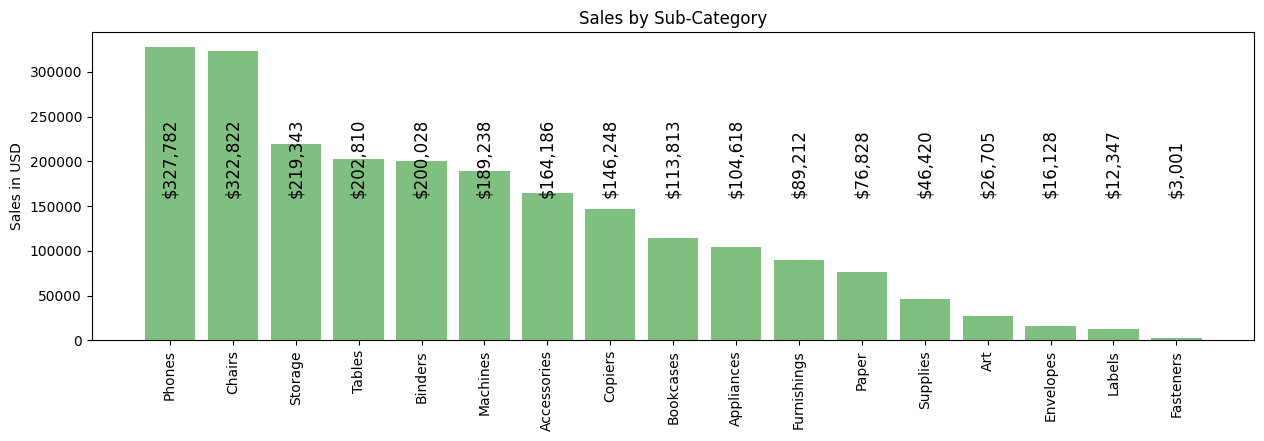

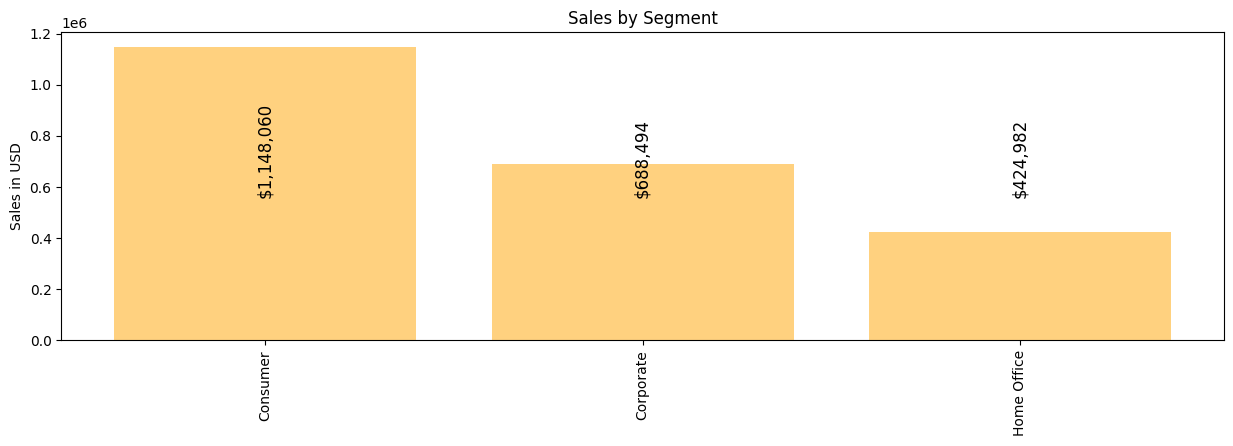

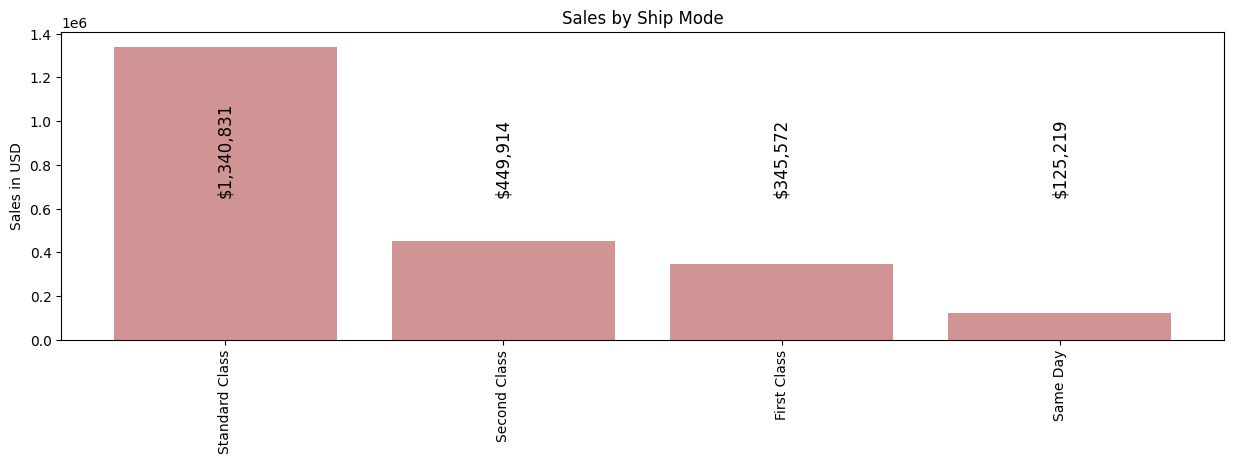

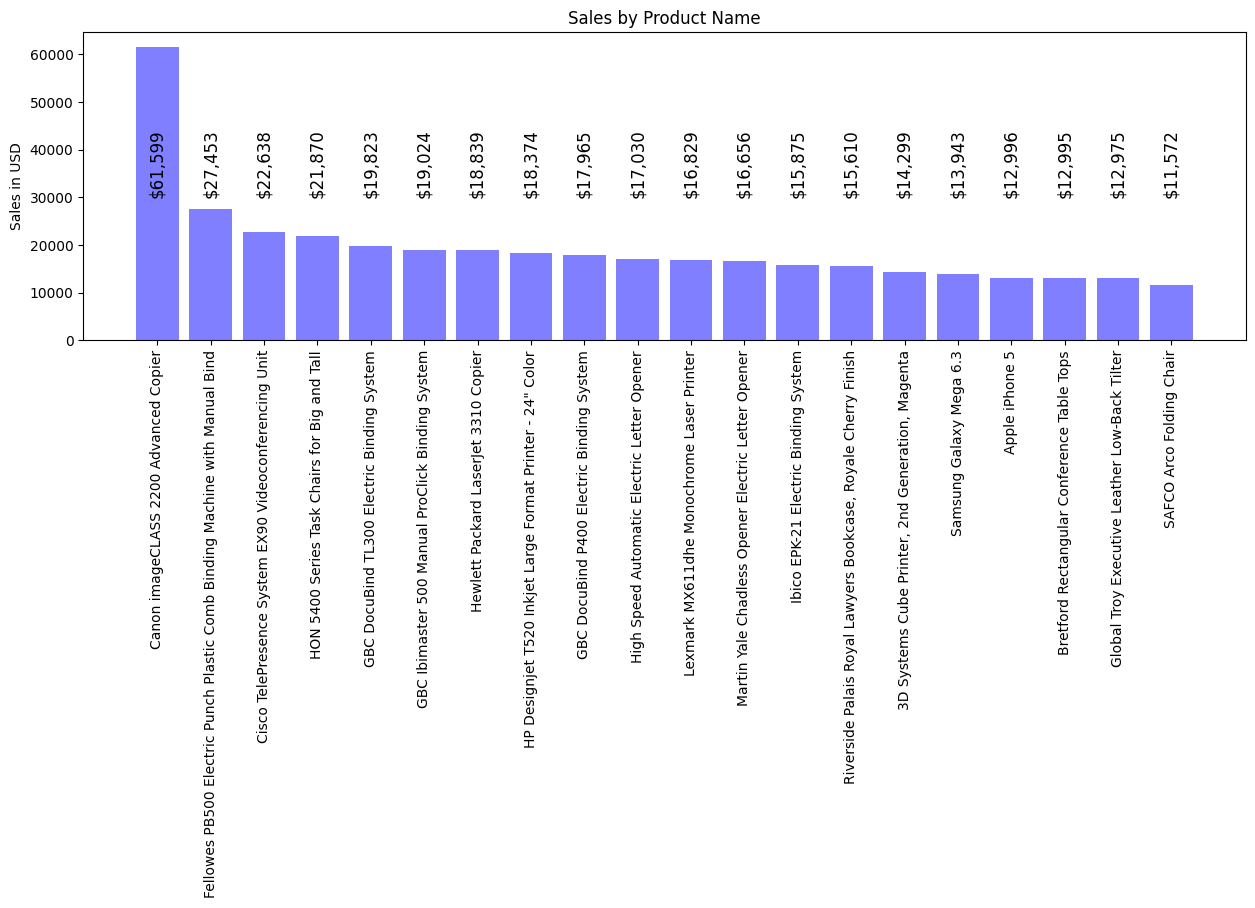

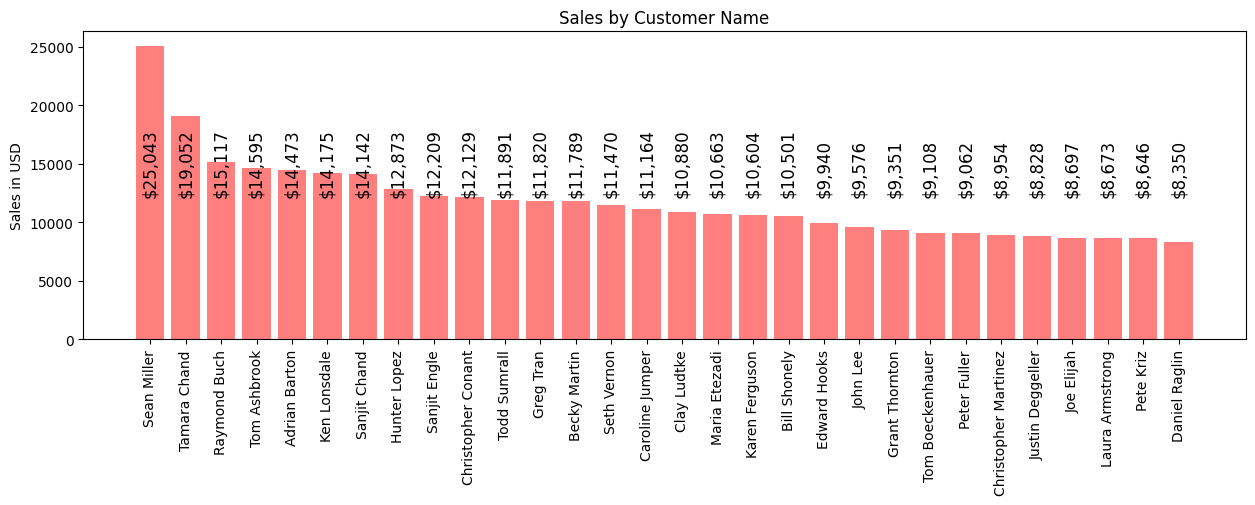

In [ ]:

sales_plot_by_group('State',20, color='blue') # plot sales per state and show 20 top states
sales_plot_by_group('Region',color='red') # plot sales per region
sales_plot_by_group('Category',color ='gray') # plot sales by category
sales_plot_by_group('Sub-Category',color='green') # plot sales by sub-category
sales_plot_by_group('Segment',color='orange') # plot sales by segment
sales_plot_by_group('Ship Mode',color='brown') # plot sales by ship mode
sales_plot_by_group('Product Name', 20, color='blue') # plot sales by product name
sales_plot_by_group('Customer Name',30, color='red') # plot sales by customer name


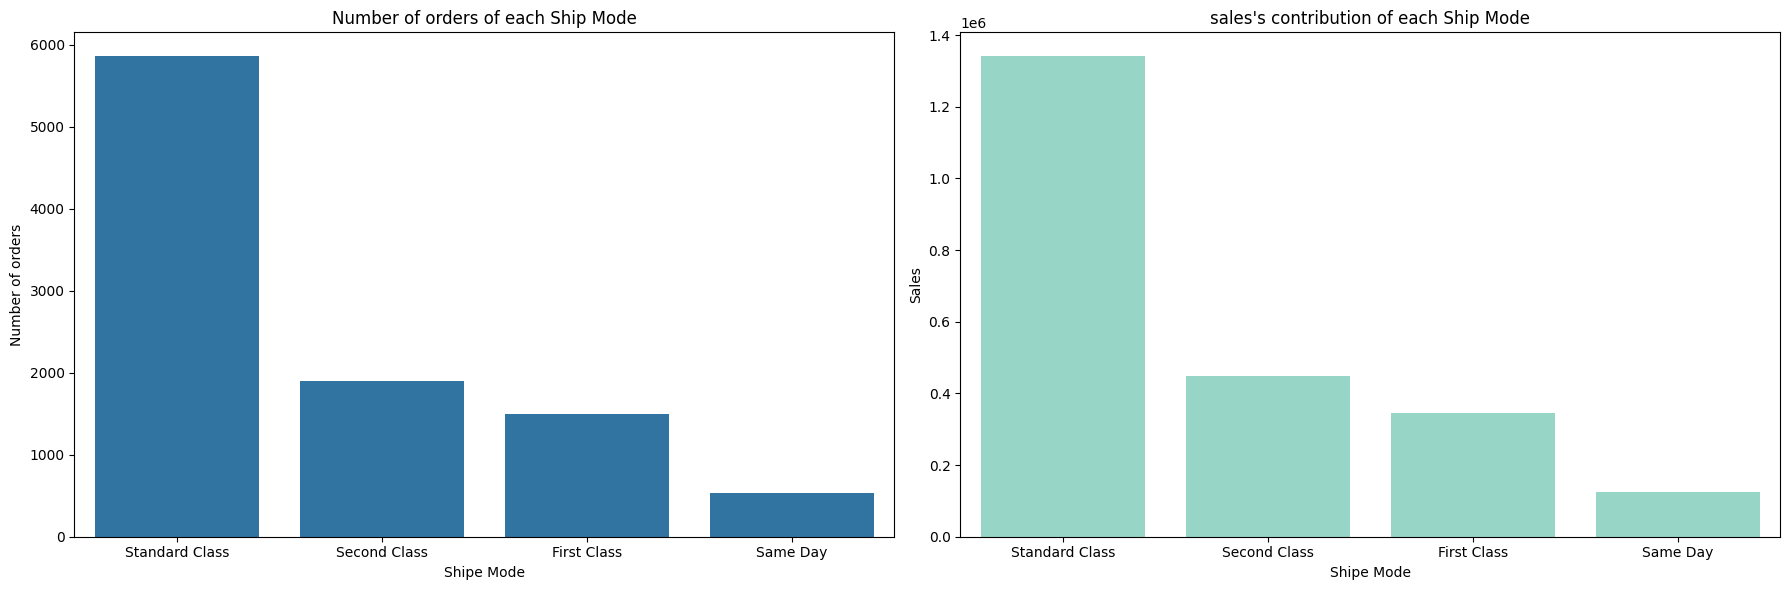

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Plot 1
ax_1 = plt.subplot(1,2,1)
order_sort = df['Ship Mode'].value_counts().index.tolist()
sns.countplot(x= df['Ship Mode'], order=order_sort)
ax_1.set_title("Number of orders of each Ship Mode")
ax_1.set(xlabel="Shipe Mode", ylabel="Number of orders")
# Plot 2
ax_2 = plt.subplot(1,2,2)
df_shipmode = df.groupby("Ship Mode")['Sales'].sum().reset_index()
df_shipmode = df_shipmode.sort_values('Sales', ascending= False)
sns.barplot(data= df_shipmode, x= 'Ship Mode', y = 'Sales', color= '#8DDFCB')
ax_2.set_title("sales's contribution of each Ship Mode")
ax_2.set(xlabel="Shipe Mode", ylabel="Sales")
plt.tight_layout()

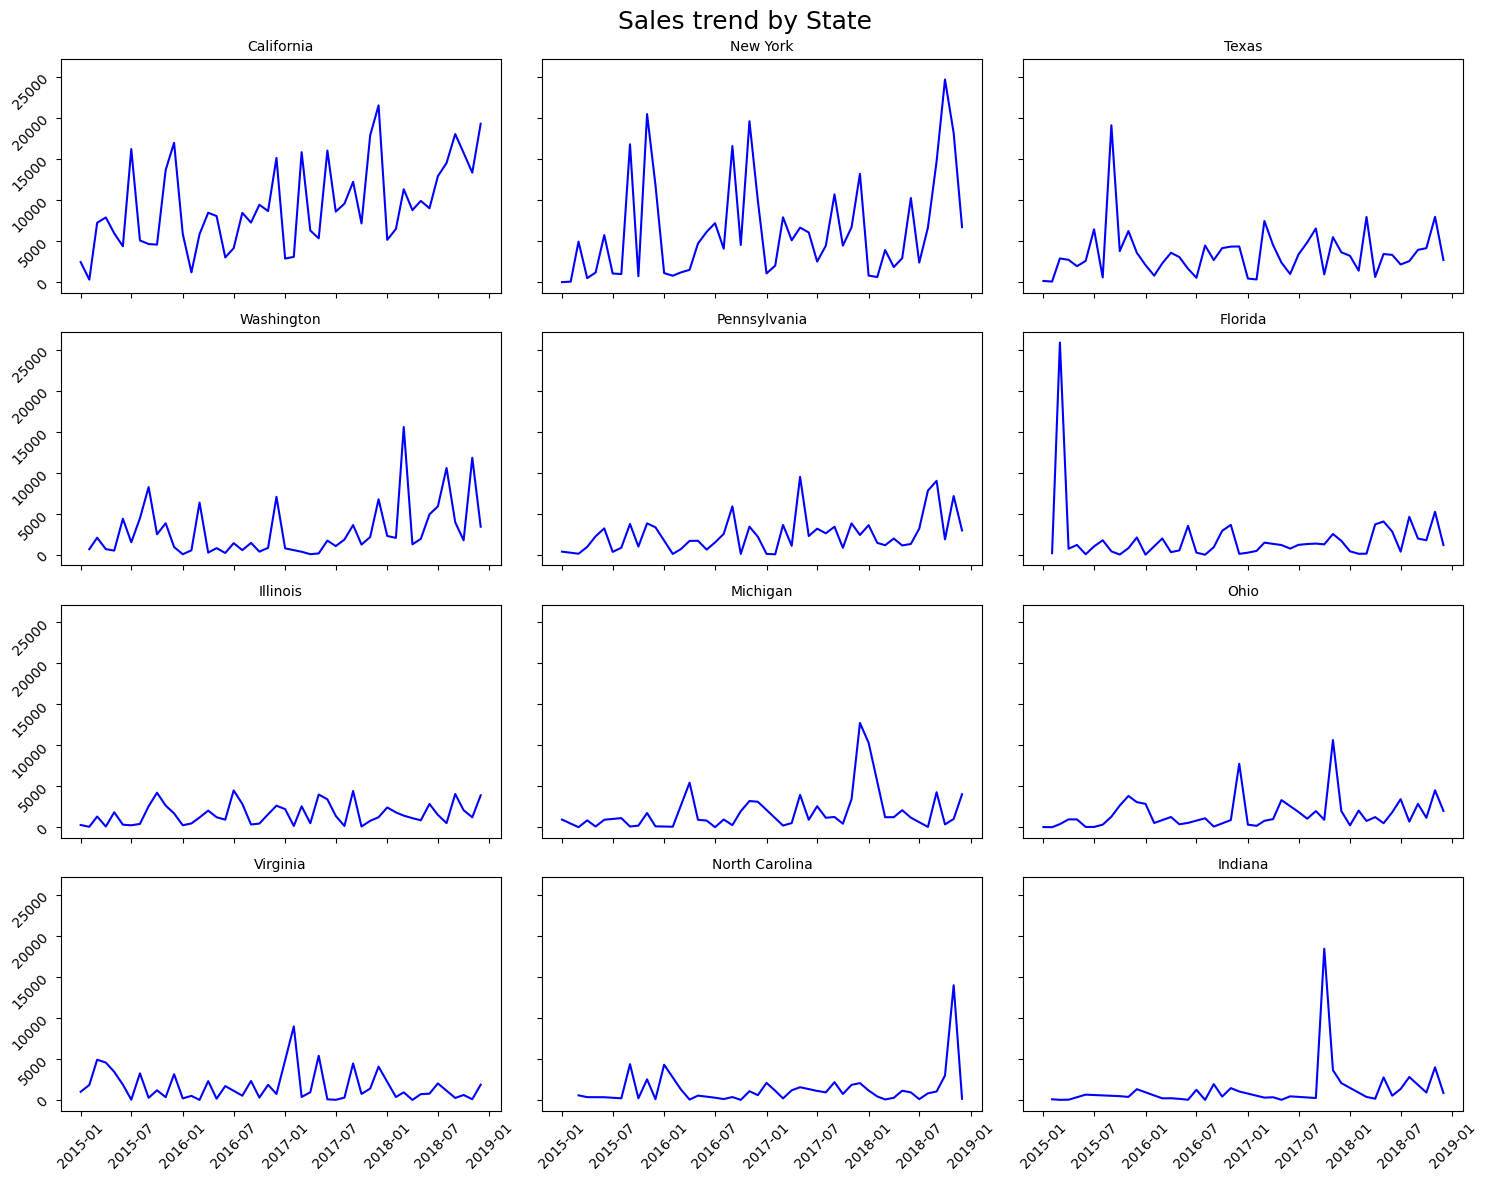

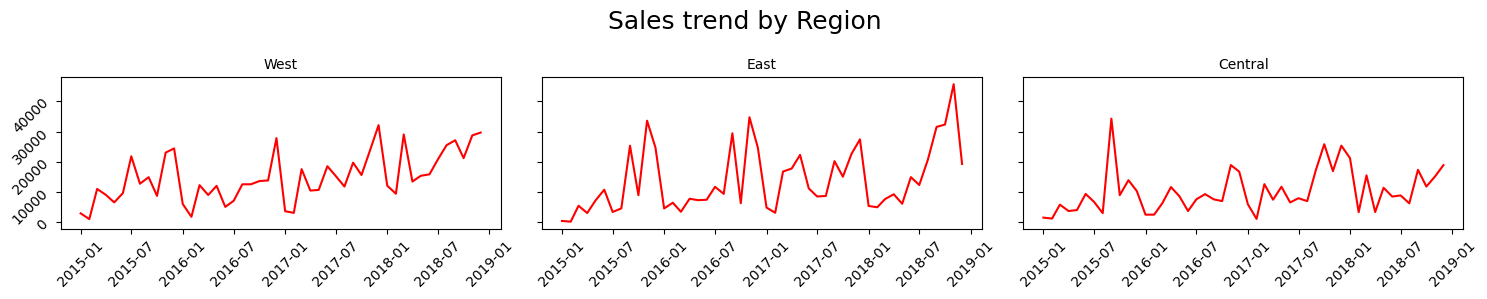

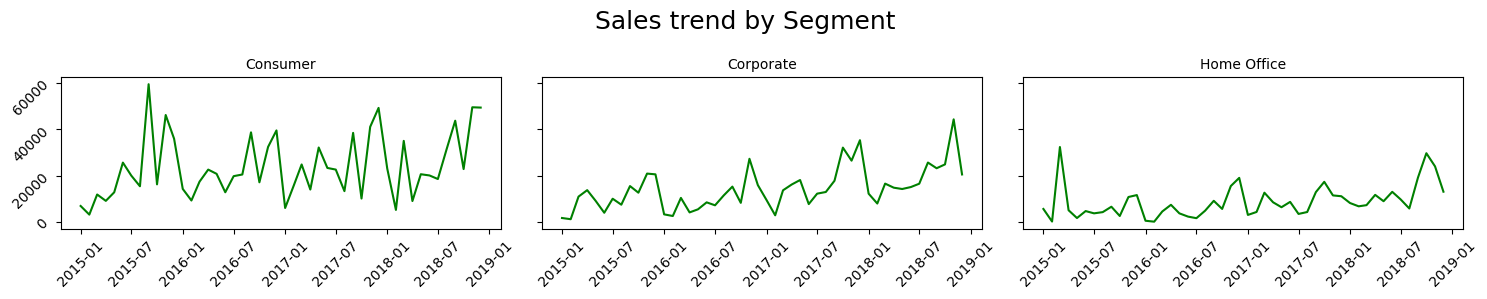

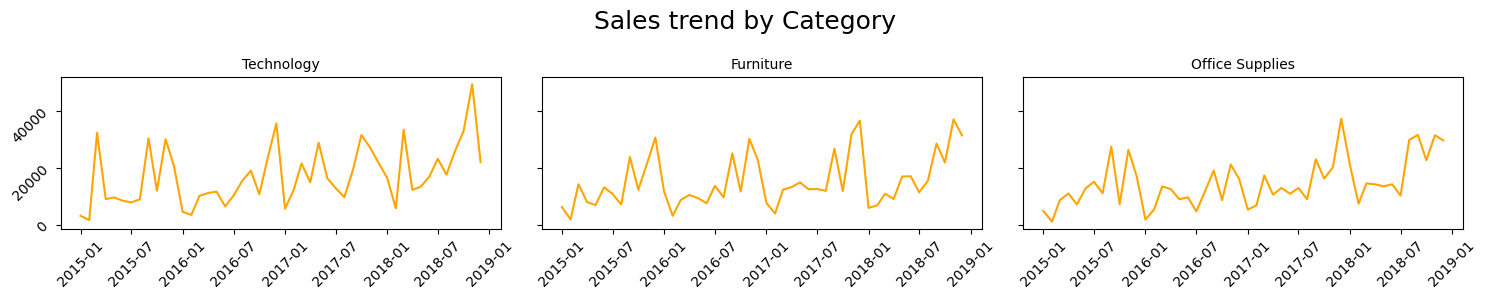

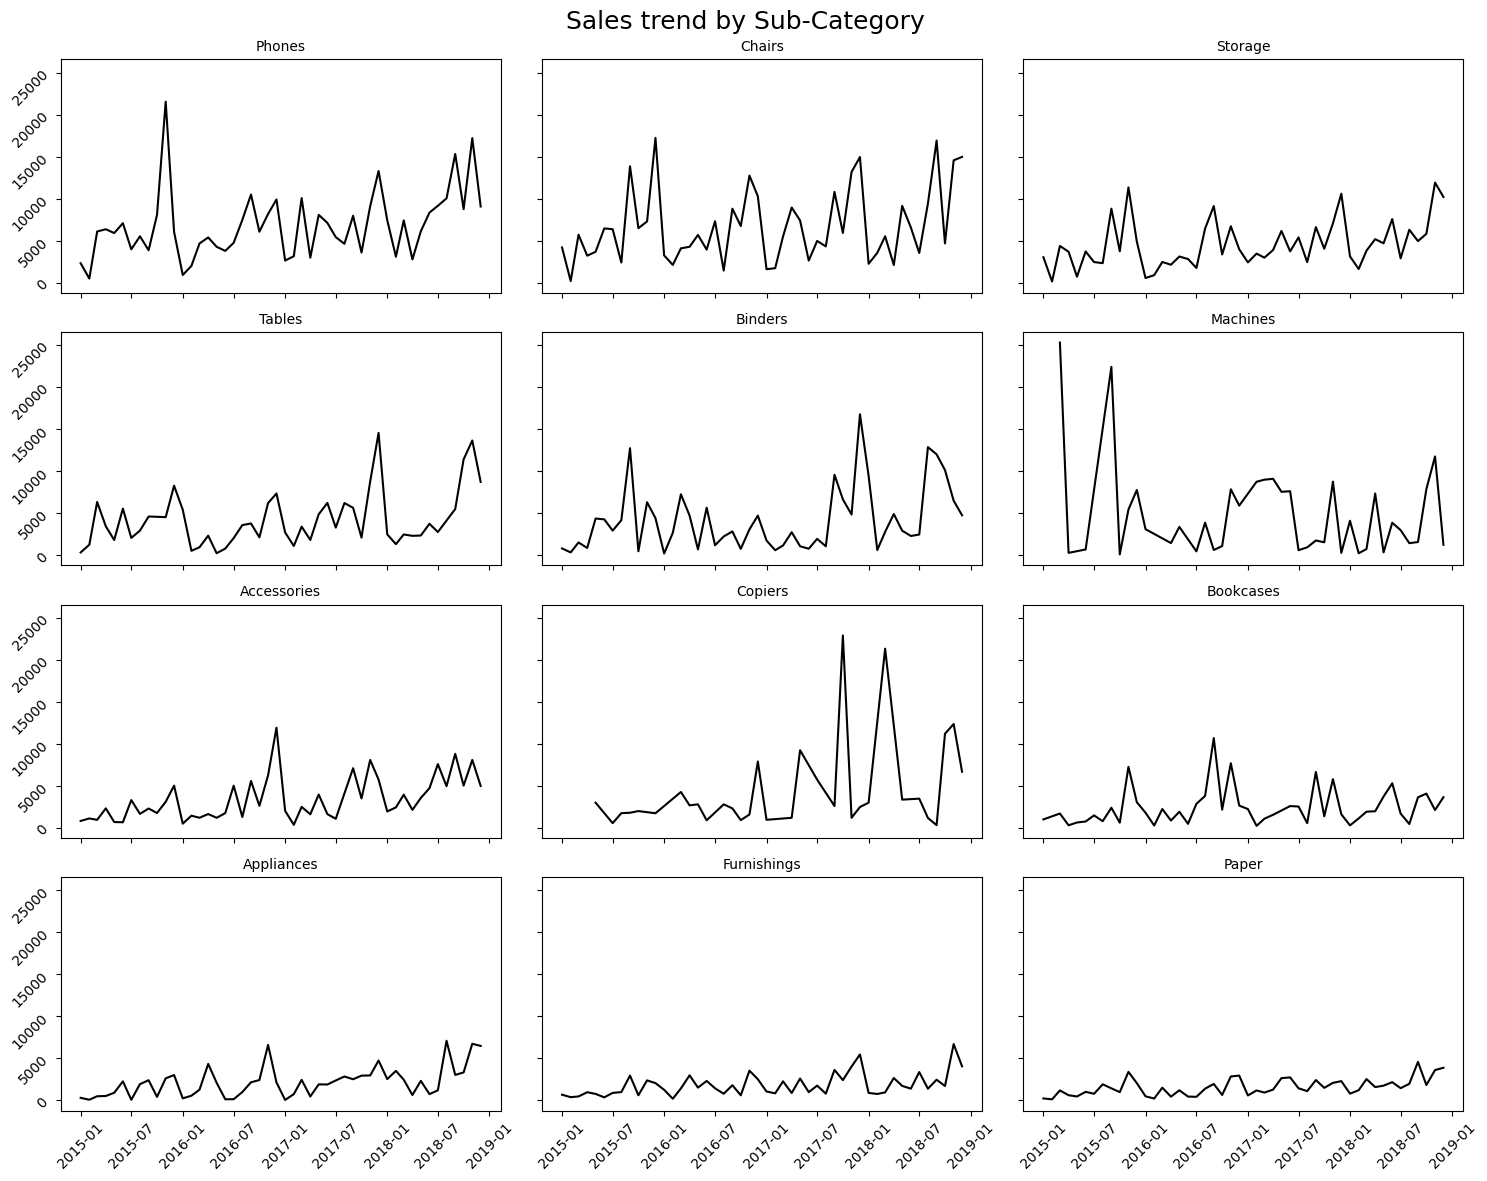

In [ ]:
# this function is to plot trend per selected feature
def plot_trend_group(group,size, color='blue'):
    sales_by_group = df.groupby(group)['Sales'].sum() # group sales by group
    sales_by_group.sort_values(ascending= False, inplace=True) # sort values
    sales_by_group.head(size) # select top records
    # subplots with 3 plots per line
    fig, axes = plt.subplots(int(size/3),3, figsize=(15,size), sharex =True, sharey =True)
    fig.suptitle('Sales trend by {}'.format(group), fontsize=18)
    # loop over selected groups in a feature
    for ax,group_name in zip(axes.flat, sales_by_group.index):
        sales_group = df[df[group]==group_name]
        sales_group = sales_group.groupby('month')['Sales'].sum()
        sales_group.index = sales_group.index.to_timestamp()
        ax.tick_params(labelrotation=45)
        ax.set_title(group_name, fontsize = 10)
        ax.plot(sales_group, color=color)
    fig.tight_layout()
plot_trend_group('State',12) # trend for top 12 states
plot_trend_group('Region',3, 'red') # trend per region
plot_trend_group('Segment',3,'green') # trend per segment
plot_trend_group('Category',3, 'orange') # trend per Category
plot_trend_group('Sub-Category',12, 'black') # trend per Sub-Category
# plot_trend_group('Product Name',12,'red') # trend per top 12 Product Name

# Phone Data Analysis

In [ ]:
df_phone = df[df["Sub-Category"]=="Phones"]

df_phone = df_phone.sort_values(by="Ship Date")
df_phone = df_phone.reset_index(drop=True)
df_daily_sales = df_phone.groupby('Order Date')['Sales'].sum().reset_index()
df_daily_sales




,Order Date,Sales
0,2015-01-06,1147.940
1,2015-01-16,124.200
2,2015-01-20,699.930
3,2015-01-26,343.330
4,2015-02-02,180.960
...,...,...
561,2018-12-25,90.480
562,2018-12-27,164.388
563,2018-12-28,14.850
564,2018-12-29,302.376


In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(df_daily_sales) * 0.80)
train_data = df_daily_sales.iloc[:train_size].copy()
test_data = df_daily_sales.iloc[train_size:].copy()

# Tạo đặc trưng thời gian
train_data['Time'] = np.arange(len(train_data))
test_data['Time'] = np.arange(len(train_data), len(df_daily_sales))

# Extract DayOfWeek and Month features
train_data['DayOfWeek'] = train_data['Order Date'].dt.dayofweek
train_data['Month'] = train_data['Order Date'].dt.month
train_data["Day"] = train_data['Order Date'].dt.day
test_data['DayOfWeek'] = test_data['Order Date'].dt.dayofweek
test_data['Month'] = test_data['Order Date'].dt.month
test_data["Day"] = test_data['Order Date'].dt.day

In [ ]:
window_size = 5

# Tạo đặc trưng cho tập huấn luyện
for i in range(1, window_size + 1):
    train_data[f'Lag_{i}'] = train_data['Sales'].shift(i)

# Xóa các hàng có giá trị NaN do việc tạo đặc trưng Sliding Window
train_data = train_data.dropna().reset_index(drop=True)

# Thay thế giá trị NaN bằng giá trị trước đó
# train_data.fillna(method='bfill', inplace=True)

# Tạo đặc trưng cho tập kiểm tra
for i in range(1, window_size + 1):
    test_data[f'Lag_{i}'] = test_data['Sales'].shift(i)

# Xóa các hàng có giá trị NaN do việc tạo đặc trưng Sliding Window
test_data = test_data.dropna().reset_index(drop=True)

# Các đặc trưng để huấn luyện
features = ['DayOfWeek', 'Day', 'Month'] + [f'Lag_{i}' for i in range(1, window_size + 1)]

In [ ]:
train_data

,Order Date,Sales,Time,DayOfWeek,Month,Day,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
0,2015-02-06,306.560,5,4,2,6,180.960,343.330,699.930,124.200,1147.940
1,2015-03-01,5.940,6,6,3,1,306.560,180.960,343.330,699.930,124.200
2,2015-03-03,9.990,7,1,3,3,5.940,306.560,180.960,343.330,699.930
3,2015-03-11,587.970,8,2,3,11,9.990,5.940,306.560,180.960,343.330
4,2015-03-16,471.920,9,0,3,16,587.970,9.990,5.940,306.560,180.960
...,...,...,...,...,...,...,...,...,...,...,...
442,2018-06-01,158.376,447,4,6,1,156.792,250.328,842.346,1123.128,781.942
443,2018-06-02,2.970,448,5,6,2,158.376,156.792,250.328,842.346,1123.128
444,2018-06-03,503.960,449,6,6,3,2.970,158.376,156.792,250.328,842.346
445,2018-06-04,71.984,450,0,6,4,503.960,2.970,158.376,156.792,250.328


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from plotly.subplots import make_subplots

# Huấn luyện mô hình Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(train_data[features], train_data['Sales'])

# Sử dụng mô hình để dự đoán
test_data['Predicted_sales'] = linear_reg.predict(test_data[features])

# Đánh giá mô hình
mse_linear_reg = mean_squared_error(test_data['Sales'], test_data['Predicted_sales'])
print(f"Mean Squared Error của Linear Regression: {mse_linear_reg}")

Mean Squared Error của Linear Regression: 694202.0883302052


In [ ]:
# Huấn luyện mô hình Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(train_data[features], train_data['Sales'])

# Sử dụng mô hình để dự đoán
test_data['Predicted_sales'] = linear_reg.predict(test_data[features])

# Đánh giá mô hình
mse_linear_reg = mean_squared_error(test_data['Sales'], test_data['Predicted_sales'])
print(f"Mean Squared Error của Linear Regression: {mse_linear_reg}")

Mean Squared Error của Linear Regression: 694202.0883302052


In [ ]:
import plotly.graph_objs as go

# Vẽ biểu đồ kết quả dự đoán bằng Plotly
fig = make_subplots(rows=1, cols=1)

# Dữ liệu huấn luyện
train_trace = go.Scatter(x=train_data['Order Date'], y=train_data['Sales'], mode='lines', name='Train Data')

# Doanh thu thực tế
actual_trace = go.Scatter(x=test_data['Order Date'], y=test_data['Sales'], mode='lines', name='Actual Sales')

# Doanh thu dự đoán
predicted_trace = go.Scatter(x=test_data['Order Date'], y=test_data['Predicted_sales'], mode='lines', name='Predicted Sales')

# Thêm các trace vào figure
fig.add_trace(train_trace, row=1, col=1)
fig.add_trace(actual_trace, row=1, col=1)
fig.add_trace(predicted_trace, row=1, col=1)

# Cập nhật layout
fig.update_layout(title='Sales Prediction using Linear Regression',
                  xaxis_title='Date',
                  yaxis_title='Sales',
                  legend_title='Legend');

# Hiển thị biểu đồ
fig.show();

## Random Forest Regression

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Huấn luyện mô hình Random Forest với Grid Search để tối ưu hóa tham số
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(train_data[features], train_data['Sales'])

# Sử dụng mô hình tốt nhất để dự đoán
best_rf_reg = grid_search.best_estimator_
test_data['Predicted_sales'] = best_rf_reg.predict(test_data[features])

# Đánh giá mô hình
mse_rf_reg = mean_squared_error(test_data['Sales'], test_data['Predicted_sales'])
print(f"Mean Squared Error của Random Forest Regression: {mse_rf_reg}")


Mean Squared Error của Random Forest Regression: 705663.7454232108


In [ ]:


# Vẽ biểu đồ kết quả dự đoán bằng Plotly
fig = make_subplots(rows=1, cols=1)

# Dữ liệu huấn luyện
train_trace = go.Scatter(x=train_data['Order Date'], y=train_data['Sales'], mode='lines', name='Train Data')

# Doanh thu thực tế
actual_trace = go.Scatter(x=test_data['Order Date'], y=test_data['Sales'], mode='lines', name='Actual Sales')

# Doanh thu dự đoán
predicted_trace = go.Scatter(x=test_data['Order Date'], y=test_data['Predicted_sales'], mode='lines', name='Predicted Sales')

# Thêm các trace vào figure
fig.add_trace(train_trace, row=1, col=1)
fig.add_trace(actual_trace, row=1, col=1)
fig.add_trace(predicted_trace, row=1, col=1)

# Cập nhật layout
fig.update_layout(title='Sales Prediction using Random Forest Regression',
                  xaxis_title='Date',
                  yaxis_title='Sales',
                  legend_title='Legend');

# Hiển thị biểu đồ
fig.show();

## Support Vector Regression

In [ ]:
from sklearn.svm import SVR

# Huấn luyện mô hình Support Vector Regression (SVR) với Grid Search để tối ưu hóa tham số
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf']
}

svr_reg = SVR()
grid_search = GridSearchCV(estimator=svr_reg, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(train_data[features], train_data['Sales'])

# Sử dụng mô hình tốt nhất để dự đoán
best_svr_reg = grid_search.best_estimator_
test_data['Predicted_sales'] = best_svr_reg.predict(test_data[features])

# Đánh giá mô hình
mse_svr_reg = mean_squared_error(test_data['Sales'], test_data['Predicted_sales'])
print(f"Mean Squared Error của Support Vector Regression: {mse_svr_reg}")


Mean Squared Error của Support Vector Regression: 772256.0620892416


In [ ]:
# Vẽ biểu đồ kết quả dự đoán bằng Plotly
fig = make_subplots(rows=1, cols=1)

# Dữ liệu huấn luyện
train_trace = go.Scatter(x=train_data['Order Date'], y=train_data['Sales'], mode='lines', name='Train Data')

# Doanh thu thực tế
actual_trace = go.Scatter(x=test_data['Order Date'], y=test_data['Sales'], mode='lines', name='Actual Sales')

# Doanh thu dự đoán
predicted_trace = go.Scatter(x=test_data['Order Date'], y=test_data['Predicted_sales'], mode='lines', name='Predicted Sales')

# Thêm các trace vào figure
fig.add_trace(train_trace, row=1, col=1)
fig.add_trace(actual_trace, row=1, col=1)
fig.add_trace(predicted_trace, row=1, col=1)

# Cập nhật layout
fig.update_layout(title='Sales Prediction using Support Vector Regression',
                  xaxis_title='Date',
                  yaxis_title='Sales',
                  legend_title='Legend');

# Hiển thị biểu đồ
fig.show();

## FNN